<a href="https://colab.research.google.com/github/ifeomamegwai/Le-Wagon-python-and-ML/blob/main/Query_databases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 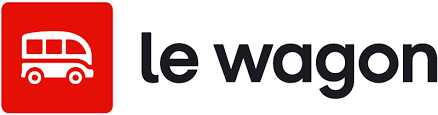

# Querying databases

In this challenge, we will query data from two common forms of SQL databases - MySQL & BigQuery

<u>Note:</u> Querying data directly from BigQuery to your notebooks will most likely be very useful during project weeks!


## SQL database

Whenever a new deal is made, the Circle data pipeline automatically saves these to a MySQL database.

We will load this data directly in the colab notebook and read them as pandas dataframes - we can then perform our analysis in Python!

Execute the cell below to install `pymsql` library. \
This will allow you to interact with a MySQL database in Python

In [ ]:
!pip install pymysql --upgrade 'sqlalchemy<2.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.32
    Uninstalling SQLAlchemy-2.0.32:
      Successfully uninstalled SQLAlchemy-2.0.32
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.53 which is incompatible.


We will now use SQLAlchemy to create the connection. Please refer to the lecture slides for the correct imports / syntax.

*The connection settings below are what you will need to access the Circle databse*

- `driver_name` = "mysql+pymysql"

- `db_host` = "db-mysql-ams3-59999-do-user-4791174-0.b.db.ondigitalocean.com"

- `db_port` = 25060
- `db_name` = "wagon_gwz"
- `db_user`="wagon_gwz_readonly"
- `db_pass`="MAiyXsbfH@JfxNDgZcxqUaMhrMNiG4TN"

In [ ]:
# your code here
from sqlalchemy import inspect, create_engine, engine

# your code here

driver_name = "mysql+pymysql"
db_host = "db-mysql-ams3-59999-do-user-4791174-0.b.db.ondigitalocean.com"
db_port = 25060
db_name = "wagon_gwz"
db_user="wagon_gwz_readonly"
db_pass="MAiyXsbfH@JfxNDgZcxqUaMhrMNiG4TN"

con = create_engine(
   # Equivalent URL:
   # mysql+pymysql://<db_user>:<db_pass>@<db_host>:<db_port>/<db_name>
   engine.url.URL.create(
       drivername=driver_name,
       username=db_user,
       password=db_pass,
       host=db_host,
       port=db_port,
       database=db_name,
   )
)

Once you have established a connection, list all the tables in the database.


In [ ]:
# your code here
con.table_names()

<ipython-input-7-431e51c80e57>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  con.table_names()


['acquisition',
 'deals',
 'deals_churn',
 'gz_low_margin',
 'gz_product',
 'gz_sales']

Finally, load all the deals in a Pandas DataFrame.

In [ ]:
# your code here
import pandas as pd

query= "SELECT * FROM deals"
df_deals = pd.read_sql(query, con)
df_deals

,deal_id,deal_name,contact_email,deal_owner,pipeline,deal_stage,priority,comment,last_event,updated_at
0,1,Asana_1,asana@gmail.com,olivier@donnees-transitions.com,Sales pipeline,contract_sent,Medium,Yoga specialist,Last Remind 20/06,2022-12-05 21:47:35
1,2,Bolsport_1,bolsport@gmail.com,olivier@donnees-transitions.com,Sales pipeline,closed_lost,Medium,Sport sales specialist,,2022-11-04 16:43:51
2,3,CentreCommercial_1,centre@gmail.com,olivier@donnees-transitions.com,Sales pipeline,To contact,High,,KO,2022-10-03 06:58:25
3,4,HIPPI_1,hippi@gmail.com,olivier@donnees-transitions.com,Sales pipeline,closed_lost,Low,,Last Remind 02/05,2023-01-27 16:43:35
4,5,Jane_1,jane@gmail.com,olivier@donnees-transitions.com,Sales pipeline,To contact,Medium,Concept store,Last Remind 30/08,2022-10-03 06:58:25
5,6,McKinar_1,mckinar@gmail.com,olivier@donnees-transitions.com,Sales pipeline,contract_sent,High,t-shirt for event,Ok,2022-11-03 22:46:30
6,7,Mutuelle_1,mutuelle@gmail.com,olivier@donnees-transitions.com,Sales pipeline,To contact,Low,,Ok,2022-10-03 06:58:25
7,8,OffStudio_1,off@gmail.com,olivier@donnees-transitions.com,Sales pipeline,To contact,High,Concept store,Last Remind 30/08,2022-10-03 06:58:25
8,9,Peacock_1,peacock@gmail.com,olivier@donnees-transitions.com,Sales pipeline,To contact,High,Yoga specialist,Last Remind 30/08,2022-10-03 06:58:25
9,10,Qee_1,qee@gmail.com,olivier@donnees-transitions.com,Sales pipeline,closed_won,High,Yoga specialist,Last Remind 24/08,2022-10-03 07:21:21


🎉 Congrats! You have now loaded data from a SQL database into a Python notebook in a few lines of code.

## Load data from BigQuery

1) In your BigQuery console, create a new dataset called `course29`.

Copy [this table](https://console.cloud.google.com/bigquery?ws=!1m20!1m4!1m3!1sdt-le-wagon!2sbquxjob_24727252_183d6296a5b!3sEU!1m4!4m3!1sdata-analytics-bootcamp-363212!2scourse30!3sgwz_orders!1m4!1m3!1sdata-analytics-bootcamp-363212!2sbquxjob_60c28a98_184a5ccde33!3sEU!1m4!4m3!1sdata-analytics-bootcamp-363212!2scourse29!3sgwz_orders_samples&authuser=2&project=data-analytics-bootcamp-363212) into it.

2) Next, load the data into a DataFrame. Since you're using Google Colab, connecting to a service account isn't necessary.
Rather than importing with `from google.oauth2 import service_account`, we'll authenticate directly by using the script provided below.

In [ ]:
from google.colab import auth

# Will collect your credentials
auth.authenticate_user()


In [ ]:
# your code here
project_id = "fair-jigsaw-429509-d4"
dataset = "course29"
table = "gwz_orders_samples"
query = f"SELECT * FROM `{project_id}.{dataset}.{table}`"

df_orders = pd.read_gbq(query, project_id=project_id)
df_orders

,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover
0,2021-07-12,932839,176738,FRANCE,17,275,1014.00
1,2020-12-31,715121,29041,FRANCE,01,34,172.80
2,2020-06-26,494935,130040,FRANCE,01,34,94.77
3,2020-06-26,494928,130040,FRANCE,01,34,94.62
4,2020-10-26,627943,30714,FRANCE,01,34,123.25
...,...,...,...,...,...,...,...
4995,2020-08-28,559828,121046,FRANCE,29,202,589.96
4996,2019-06-18,137506,2615,FRANCE,84,205,538.79
4997,2021-12-16,1081749,225653,FRANCE,03,238,814.86
4998,2019-01-22,18507,2615,FRANCE,76,243,457.78
